4.Problem Satement :Telecall uses 4 centers around the globe to process customer order forms. They audit a certain % of the customer order forms. Any error in order form renders it defective and must be reworked before processing. The manager wants to check whether the defective % varies by center. Please analyze the data at 5% significance level and help the manager draw appropriate inferences.


-----------------------------------------------------------------------------------------------------------------------------------------------------------

1.1 Business Objective 

Goal:

To assess and compare the performance of the four centers in terms of processing error-free customer order forms.
Identify if any center has a significantly higher defect rate, allowing the manager to take corrective actions.
___________________________________________________________________________________________________________________________________________________________

1.2 Constraints 

Audit Sampling Bias:
Results are based on a random audit of order forms, which may not capture all possible errors.

Operational Variability:
Differences in team expertise, workload, or system errors may affect defect rates.

Time Sensitivity:
Quick decisions are needed to address high-defect centers and ensure continuous improvement.

Data Accuracy:
Ensuring that audit data accurately reflects the defect percentage for each center.
__________________________________________________________________________________________________________________

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
data=pd.read_csv("CustomerOrderform.csv")
data.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [8]:
#Now will check shape of the data
data.shape

(315, 4)

In [11]:
#Data Preprocessing
#first we will check the datatype
data.dtypes 

Phillippines    object
Indonesia       object
Malta           object
India           object
dtype: object

In [13]:
data.columns

Index(['Phillippines', 'Indonesia', 'Malta', 'India'], dtype='object')

In [17]:
# ============================
# Data Preprocessing
# ============================
# Convert responses to lowercase and map to binary format (1 for 'defective', 0 for 'non-defective')
data = data.apply(lambda x: x.str.strip().str.lower())  # Strip spaces and convert to lowercase
data = data.applymap(lambda x: 1 if x == 'defective' else 0)  # Map 'defective' to 1 and others to 0


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1904\517854692.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: 1 if x == 'defective' else 0)  # Map 'defective' to 1 and others to 0


In [19]:
#Check the null values
data.isna().sum() 
#from ouput we can see there are 0 null values

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

In [26]:
data.describe() #by this we came to know min ,max,std,mean 25%,75%,50%

,Phillippines,Indonesia,Malta,India
count,315.000000,315.000000,315.000000,315.000000
mean,0.092063,0.104762,0.098413,0.063492
std,0.289576,0.306734,0.298346,0.244234
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Phillippines  315 non-null    int64
 1   Indonesia     315 non-null    int64
 2   Malta         315 non-null    int64
 3   India         315 non-null    int64
dtypes: int64(4)
memory usage: 10.0 KB


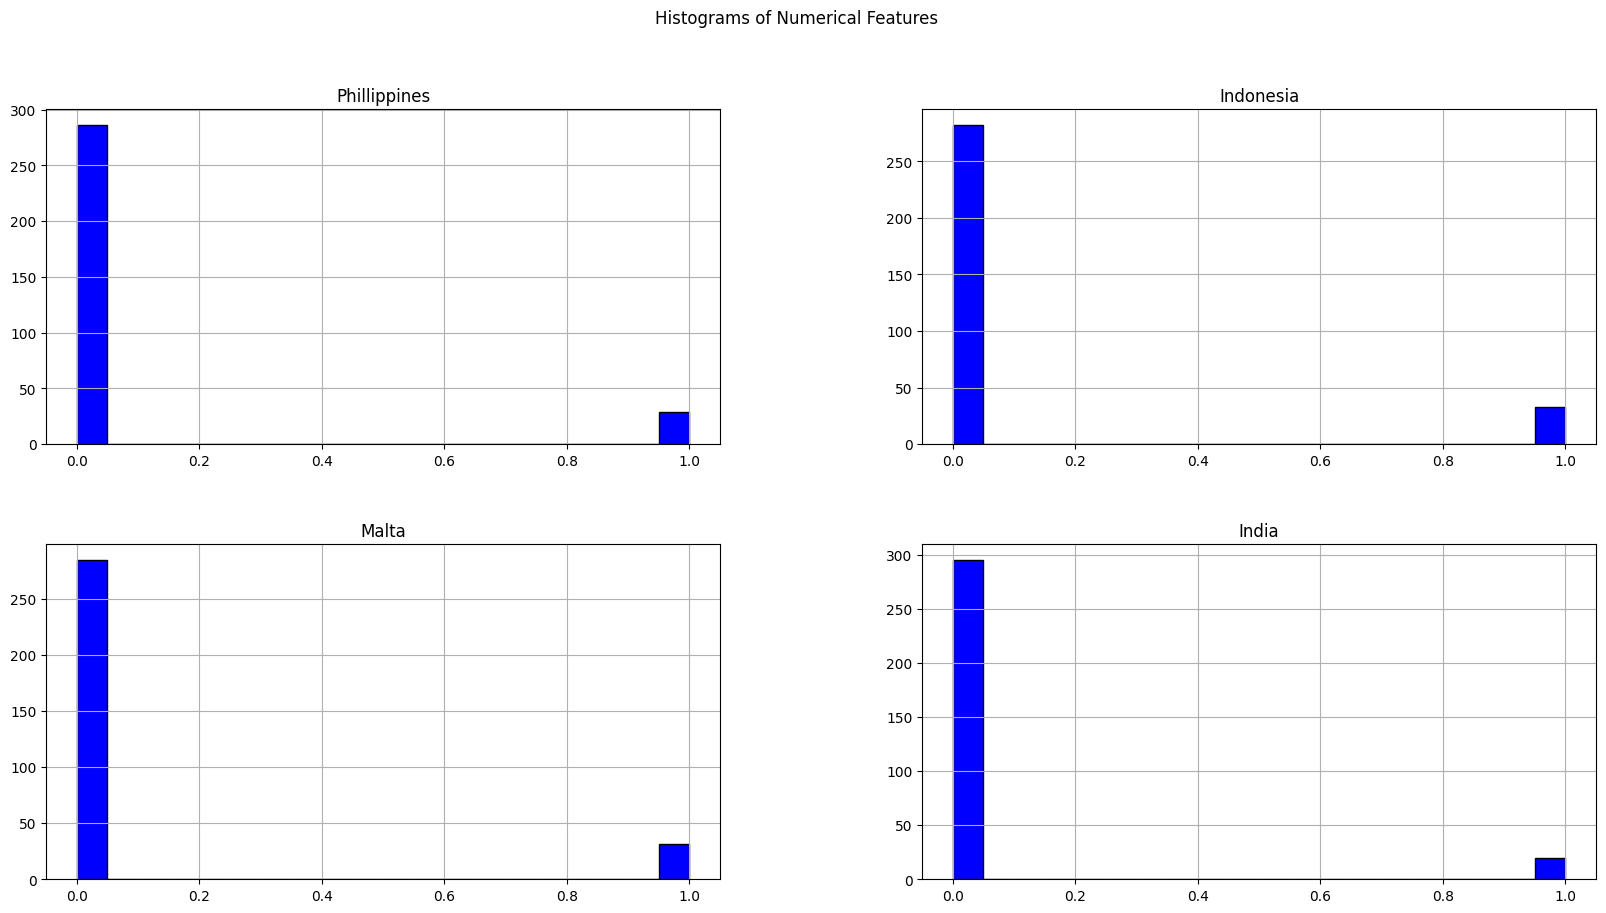

In [24]:
#Univariate Analysis
import matplotlib.pyplot as plt
data.hist(figsize=(20, 10), bins=20, color='blue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()

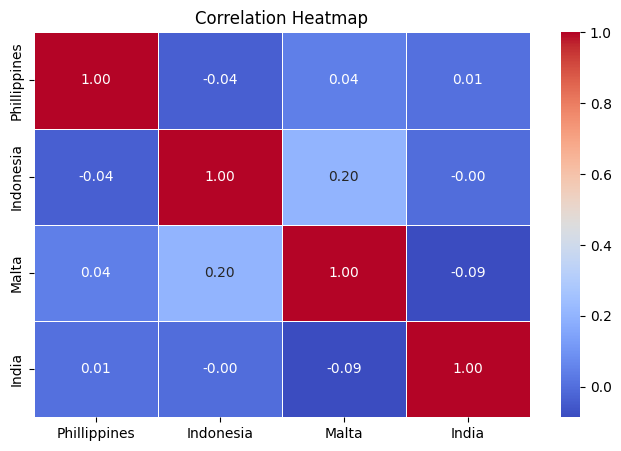

In [34]:
# Correlation heatmap
plt.figure(figsize=(8,5))
sns.heatmap(data[['Phillippines', 'Indonesia', 'Malta', 'India']].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
#From this graph we understand 'Phillippines', 'Indonesia', 'Malta', 'India' are weakly corelated

In [29]:
import scipy.stats as stats

In [36]:
# ============================
# Create Contingency Table
# ============================
# Create a contingency table to compare defect counts across centers
contingency_table = pd.DataFrame({
    'Center 1': [data['Phillippines'].sum(), len(data['Phillippines']) - data['Phillippines'].sum()],
    'Center 2': [data['Indonesia'].sum(), len(data['Indonesia']) - data['Indonesia'].sum()],
    'Center 3': [data['Malta'].sum(), len(data['Malta']) - data['Malta'].sum()],
    'Center 4': [data['India'].sum(), len(data['India']) - data['India'].sum()]
}, index=['Defective', 'Non-Defective'])

print("Contingency Table:\n", contingency_table)

Contingency Table:
                Center 1  Center 2  Center 3  Center 4
Defective            29        33        31        20
Non-Defective       286       282       284       295


In [40]:
# ============================
# Hypothesis Testing: Chi-Square Test
# ============================
# Perform Chi-Square Test of Independence
import scipy.stats as stats
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic = {chi2_stat}")
print(f"p-value = {p_value}")
print(f"Degrees of Freedom = {dof}")
print("\nExpected Frequencies Table:\n", expected)



Chi-Square Test Results:
Chi-Square Statistic = 3.8399518559381534
p-value = 0.27927313505725293
Degrees of Freedom = 3

Expected Frequencies Table:
 [[ 28.25  28.25  28.25  28.25]
 [286.75 286.75 286.75 286.75]]


In [42]:

# Final Inference

alpha = 0.05
if p_value <= alpha:
    print("\nConclusion: Reject the null hypothesis. There is a significant difference in the defective percentages across the centers.")
else:
    print("\nConclusion: Fail to reject the null hypothesis. There is no significant difference in the defective percentages across the centers.")



Conclusion: Fail to reject the null hypothesis. There is no significant difference in the defective percentages across the centers.
